# Neural Networks with PyTorch

This is a notebook designed to introduce users to machine learning using `PyTorch` and station data. The `metloom` package developed by M3Works is needed to run this script.

This notebook is adapted from a SnowEx Hackweek tutorial developed by Ibrahim Alabi. The full tutorial may be found here: https://snowex-2024.hackweek.io/tutorials/NN_with_Pytorch/intro.html

# What is Machine Learning?
Machine learning (ML) is a field of artificial intelligence (AI) that focuses on developing algorithms or computer models using data. The goal is to use these "trained" compuer models to make decisions. Unlike traditional programming, where we write explicit rules for every situation, ML models learn patterns from data to perform tasks.

```{warning} Important
Machine learning is useful when the function ($f$) cannot be explicitly programmed, or when the relationship between the feature(s) and outcome is unknown.
```

## Data Download and Cleaning

To begin with this tutorial, we will download SNOTEL data using the `metloom` package. Users that don't have it installed can run the cell below.

In [1]:
!pip install metloom

  Using cached zeep-4.3.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached isodate-0.7.2-py3-none-any.whl.metadata (11 kB)
  Using cached requests_file-2.1.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 71.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 7.0 MB/s eta 0:00:00
Using cached zeep-4.3.1-py3-none-any.whl (101 kB)
Using cached isodate-0.7.2-py3-none-any.whl (22 kB)
Using cached requests_file-2.1.0-py2.py3-none-any.whl (4.2 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0


For a more detailed explanation on `metloom`, check out the tutorial on SNOTEL data access.

In this notebook, we will grab the following variables: SWE (`SWE`), average temperature (`TEMPAVG`), snow depth (`SNOWDEPTH`), and precipitation (`PRECIPITATION`). These variables will be obtained from the SNOTEL station at Green Lake, WA.

In [2]:
from datetime import datetime
from metloom.pointdata import SnotelPointData

# Define variables of interest
ALLOWED_VARIABLES = [
    SnotelPointData.ALLOWED_VARIABLES.SWE,
    SnotelPointData.ALLOWED_VARIABLES.TEMPAVG,
    SnotelPointData.ALLOWED_VARIABLES.SNOWDEPTH,
    SnotelPointData.ALLOWED_VARIABLES.PRECIPITATION,
]

# Define SNOTEL station
snotel_point = SnotelPointData(station_id="502:WA:SNTL", name="Green Lake")

# Get daily SNOTEL data from Green Lake, WA
data = snotel_point.get_daily_data(
    start_date=datetime(*(2010, 1, 1)),
    end_date=datetime(*(2023, 1, 1)),
    variables=ALLOWED_VARIABLES
)

data.head()

,,geometry,SWE,SWE_units,AVG AIR TEMP,AVG AIR TEMP_units,SNOWDEPTH,SNOWDEPTH_units,PRECIPITATION,PRECIPITATION_units,datasource
datetime,site,,,,,,,,,,
2010-01-01 08:00:00+00:00,502:WA:SNTL,POINT Z (-121.17093 46.54741 5930),9.2,in,32.18,degF,34.0,in,0.5,in,NRCS
2010-01-02 08:00:00+00:00,502:WA:SNTL,POINT Z (-121.17093 46.54741 5930),9.7,in,29.30,degF,37.0,in,0.3,in,NRCS
2010-01-03 08:00:00+00:00,502:WA:SNTL,POINT Z (-121.17093 46.54741 5930),10.0,in,28.94,degF,38.0,in,0.1,in,NRCS
2010-01-04 08:00:00+00:00,502:WA:SNTL,POINT Z (-121.17093 46.54741 5930),10.1,in,33.80,degF,38.0,in,0.7,in,NRCS
2010-01-05 08:00:00+00:00,502:WA:SNTL,POINT Z (-121.17093 46.54741 5930),10.8,in,36.86,degF,38.0,in,0.1,in,NRCS


Let's take a look at the data that we just collected.

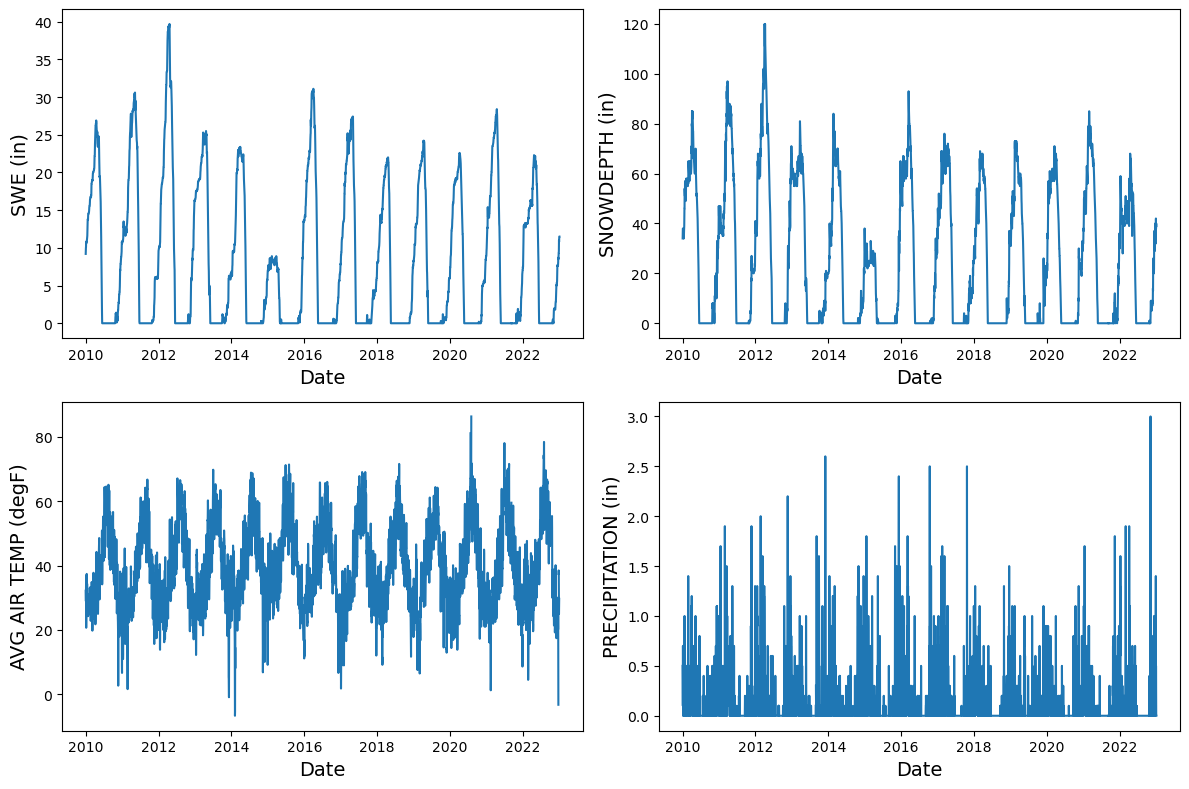

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index of the DataFrame for plotting purposes
for_plotting=data.reset_index()

# Define the units for each variable
units={
    "SWE": "in",
    "SNOWDEPTH": "in",
    "AVG AIR TEMP": "degF",
    "PRECIPITATION": "in"
}

# List the variables for plotting
variables_to_plot = [
    "SWE", "SNOWDEPTH", "AVG AIR TEMP", "PRECIPITATION"
]

# Make the plot
plt.figure(figsize=(12, 8))

for variable in variables_to_plot:
    plt.subplot(2, 2, variables_to_plot.index(variable) + 1)
    plt.plot(for_plotting["datetime"], for_plotting[variable], label=variable)
    plt.ylabel(f"{variable} ({units[variable]})", fontsize=14)
    plt.xlabel("Date", fontsize=14)

plt.tight_layout()
plt.show()

We will now process this data so it's easier to work with. First, we convert from imperial to metric units for easier interpretation. We then set the dates as the index, so that we can derive weekly rolling averages of precipitation and tempoerature.

The dataframe is then cleaned so that only snow depth, SWE, weekly temperature, and weekly precipitation are left. The dataframe is then filtered  for any NaN values, and for any zero/unrealistic snow depth and SWE values. Finally, we derive snow density from the SWE and depth data.

In [4]:
clean_df=(
    for_plotting
    .assign(
        swe=lambda x: x.SWE.map(lambda y: y*2.54 if y is not None else None),
        snowdepth=lambda x: x.SNOWDEPTH.map(lambda y: y*2.54 if y is not None else None),
        precipitation=lambda x: x.PRECIPITATION.map(lambda y: y*2.54 if y is not None else None),
        tempavg=lambda x: x['AVG AIR TEMP'].map(lambda y: (y-32)*5/9 if y is not None else None)
    )
    .set_index('datetime')
    .assign(
        precip_7_days_avg=lambda x: x.precipitation.shift().rolling(window="7D", min_periods=7).mean(),
        tempavg_7_days_avg=lambda x: x.tempavg.shift().rolling(window="7D", min_periods=7).mean(),
    )
    .filter(["datetime", "swe", "snowdepth", "tempavg_7_days_avg", "precip_7_days_avg"])
    .dropna()
    .query(
        "snowdepth != 0 and swe != 0 and "
        "snowdepth > 5 and swe > 3"
    )
    .assign(snowdensity=lambda x: x.swe / x.snowdepth)
)

In [5]:
clean_df

,swe,snowdepth,tempavg_7_days_avg,precip_7_days_avg,snowdensity
datetime,,,,,
2010-01-08 08:00:00+00:00,27.178,91.44,-1.414286,0.653143,0.297222
2010-01-09 08:00:00+00:00,27.686,91.44,-1.528571,0.544286,0.302778
2010-01-10 08:00:00+00:00,27.686,91.44,-0.971429,0.435429,0.302778
2010-01-11 08:00:00+00:00,27.686,88.90,-0.557143,0.399143,0.311429
2010-01-12 08:00:00+00:00,27.686,88.90,-0.271429,0.181429,0.311429
...,...,...,...,...,...
2022-12-20 08:00:00+00:00,20.574,88.90,-3.485714,0.254000,0.231429
2022-12-21 08:00:00+00:00,22.098,101.60,-3.557143,0.435429,0.217500
2022-12-22 08:00:00+00:00,21.590,93.98,-5.128571,0.435429,0.229730
